## PREPARATION

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("esg_raw.csv")

In [5]:
pd.set_option('display.max_columns', None)  # afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # afficher toutes les lignes

# OBJECTIFS EDA
- comprendre la structure du dataset
- cartographier les problèmes de qualité
- préparer les décisions de nettoyage dans Dataiku

## 1. Vue d'ensmble du dataset

In [6]:
df.shape

(20000, 36)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company_ID                   20000 non-null  object 
 1   Company_Name                 20000 non-null  object 
 2   Sector                       20000 non-null  object 
 3   Country                      20000 non-null  object 
 4   Fiscal_Year                  20000 non-null  int64  
 5   Employees                    20000 non-null  int64  
 6   CO2_Scope1                   20000 non-null  float64
 7   CO2_Scope2                   18000 non-null  float64
 8   CO2_Scope3                   20000 non-null  float64
 9   Energy_Consumption_MWh       20000 non-null  object 
 10  Renewable_Energy_Ratio       20000 non-null  float64
 11  Water_Consumption_m3         20000 non-null  float64
 12  Waste_Recycled_Ratio         20000 non-null  float64
 13  Hazardous_Waste_

In [8]:
for col in df.columns:
    print(col, df[col].dtype, df[col].notnull().sum())

Company_ID object 20000
Company_Name object 20000
Sector object 20000
Country object 20000
Fiscal_Year int64 20000
Employees int64 20000
CO2_Scope1 float64 20000
CO2_Scope2 float64 18000
CO2_Scope3 float64 20000
Energy_Consumption_MWh object 20000
Renewable_Energy_Ratio float64 20000
Water_Consumption_m3 float64 20000
Waste_Recycled_Ratio float64 20000
Hazardous_Waste_Tons float64 20000
Climate_Risk_Exposure int64 20000
Gender_Equality_Ratio float64 18000
Employee_Turnover float64 20000
Work_Accidents object 20000
LTI_Frequency float64 20000
Training_Hours_per_Employee float64 18000
Diversity_Index int64 20000
Social_Incidents int64 20000
Board_Independence_Ratio object 20000
Anti_Corruption_Score int64 20000
Supplier_ESG_Score int64 20000
Data_Privacy_Incidents int64 20000
Whistleblower_Cases int64 20000
Ethical_Score int64 20000
Materiality_Impact int64 20000
Materiality_Financial int64 20000
Risk_Classification object 20000
Risk_Description object 20000
Controversy_Level object 1498

## Types suspects colonnes :
- Energy_Consumption_MWh = object
- Board_Independence_Ratio = object
- Revenue = object

In [9]:
df.describe(include="all").T

count unique  \
Company_ID                     20000   4000   
Company_Name                   20000   4000   
Sector                         20000      5   
Country                        20000      7   
Fiscal_Year                  20000.0    NaN   
Employees                    20000.0    NaN   
CO2_Scope1                   20000.0    NaN   
CO2_Scope2                   18000.0    NaN   
CO2_Scope3                   20000.0    NaN   
Energy_Consumption_MWh         20000  18428   
Renewable_Energy_Ratio       20000.0    NaN   
Water_Consumption_m3         20000.0    NaN   
Waste_Recycled_Ratio         20000.0    NaN   
Hazardous_Waste_Tons         20000.0    NaN   
Climate_Risk_Exposure        20000.0    NaN   
Gender_Equality_Ratio        18000.0    NaN   
Employee_Turnover            20000.0    NaN   
Work_Accidents                 20000     14   
LTI_Frequency                20000.0    NaN   
Training_Hours_per_Employee  18000.0    NaN   
Diversity_Index              20000.0    NaN   
Social_Incidents             20000.0    NaN   
Board_Independence_Ratio       20000    142   
Anti_Corruption_Score        20000.0    NaN   
Supplier_ESG_Score           20000.0    NaN   
Data_Privacy_Incidents       20000.0    NaN   
Whistleblower_Cases          20000.0    NaN   
Ethical_Score                20000.0    NaN   
Materiality_Impact           20000.0    NaN   
Materiality_Financial        20000.0    NaN   
Risk_Classification            20000      6   
Risk_Description               20000      1   
Controversy_Level              14980      3   
Certifications                 20000      4   
Revenue                        20000  19923   
Currency                       15937      4   

                                                                top   freq  \
Company_ID                                                   C_0001      5   
Company_Name                                           Company_0001      5   
Sector                                                     Industry   4145   
Country                                                 Netherlands   3060   
Fiscal_Year                                                     NaN    NaN   
Employees                                                       NaN    NaN   
CO2_Scope1                                                      NaN    NaN   
CO2_Scope2                                                      NaN    NaN   
CO2_Scope3                                                      NaN    NaN   
Energy_Consumption_MWh                                      13021.4      5   
Renewable_Energy_Ratio                                          NaN    NaN   
Water_Consumption_m3                                            NaN    NaN   
Waste_Recycled_Ratio                                            NaN    NaN   
Hazardous_Waste_Tons                                            NaN    NaN   
Climate_Risk_Exposure                                           NaN    NaN   
Gender_Equality_Ratio                                           NaN    NaN   
Employee_Turnover                                               NaN    NaN   
Work_Accidents                                                    3   4326   
LTI_Frequency                                                   NaN    NaN   
Training_Hours_per_Employee                                     NaN    NaN   
Diversity_Index                                                 NaN    NaN   
Social_Incidents                                                NaN    NaN   
Board_Independence_Ratio                                       0.34    298   
Anti_Corruption_Score                                           NaN    NaN   
Supplier_ESG_Score                                              NaN    NaN   
Data_Privacy_Incidents                                          NaN    NaN   
Whistleblower_Cases                                             NaN    NaN   
Ethical_Score                                                   NaN    NaN   
Materiality_Impact           

## 2. Analyse de la qualité des données

- 2.1 Valeurs manquantes

In [10]:
# affiche le pourcentage de valeurs manquantes par colonnes

df.isna().mean().sort_values(ascending=False)*100

Controversy_Level              25.100
Currency                       20.315
Gender_Equality_Ratio          10.000
CO2_Scope2                     10.000
Training_Hours_per_Employee    10.000
Whistleblower_Cases             0.000
Social_Incidents                0.000
Board_Independence_Ratio        0.000
Anti_Corruption_Score           0.000
Supplier_ESG_Score              0.000
Data_Privacy_Incidents          0.000
Materiality_Impact              0.000
Ethical_Score                   0.000
Materiality_Financial           0.000
Risk_Classification             0.000
Risk_Description                0.000
Certifications                  0.000
Revenue                         0.000
Diversity_Index                 0.000
Company_ID                      0.000
Company_Name                    0.000
Work_Accidents                  0.000
Employee_Turnover               0.000
Climate_Risk_Exposure           0.000
Hazardous_Waste_Tons            0.000
Waste_Recycled_Ratio            0.000
Water_Consum

- quelles seront les imputations ? globale ? sectorielle ? par année ?
- comment : mediane/ moyenne ?
- quelles données resteront vides ?

- 2.2 Types et formats incohérents
- unique()[:x] permet d'avoir un aperçu des des données
- à approfondir avec .sample(x) si besoin ou value_counts()

In [11]:
df["Energy_Consumption_MWh"].unique()[:20]

array(['16067.9', '16288.4', '11087.6', '15594.8', '9006.7', '20477.6',
       '14195.8', '16396.6', '15917.5', '19153.4', '14719.9', '11730.5',
       '16202.4', '19044.2', '18570.1', '12272.4', '13063.8', '15540.2',
       '17311.1', '9700.5'], dtype=object)

In [12]:
df["Energy_Consumption_MWh"].value_counts().sort_values(ascending=False)

Energy_Consumption_MWh
13021.4     5
14809.1     5
16074.9     4
17726.4     4
15697.9     4
15764.5     4
14755.8     4
14186.4     4
14703.8     3
11204.1     3
14640.4     3
17231.9     3
12290.7     3
14214.3     3
14077.0     3
15536.9     3
16509.8     3
16187.4     3
15020.7     3
15941.5     3
16704.2     3
16717.8     3
17274.7     3
15023.8     3
13894.3     3
15246.7     3
13950.4     3
14597.8     3
14308.9     3
13976.7     3
15961.2     3
15858.3     3
13825.1     3
13167.4     3
13817.0     3
17491.6     3
15184.1     3
13343.5     3
15564.4     3
12799.8     3
15969.1     3
14404.1     3
16837.3     3
14047.6     3
16344.8     3
16232.3     3
12384.6     3
14806.1     3
16087.3     3
14382.4     3
18856.8     3
16422.1     3
12954.9     3
12990.3     3
14462.2     3
13469.5     3
13900.1     3
19141.7     3
16951.7     3
17214.4     3
14778.7     3
14228.0     3
16130.6     3
12800.6     3
14090.6     3
16572.1     3
14587.3     3
14959.0     3
14727.7     3
14972.7    

In [13]:
df["Revenue"].unique()[:20]

array(['406949999', '313289869', '268766350', '247563313', '80141185',
       '237482668', '139593077', '181.09M', '58399217', '201.64M',
       '227962348', '259858948', '233543965', '435660406', '60394100',
       '329800885', '480353980', '315414258', '135.26M', '140636090'],
      dtype=object)

In [14]:
df["Revenue"].value_counts()

Revenue
174.09M      3
491.26M      2
63.49M       2
378.87M      2
45.40M       2
218.09M      2
406.16M      2
228.84M      2
97.46M       2
142.85M      2
287.19M      2
15.87M       2
469.62M      2
417.54M      2
36.19M       2
155.38M      2
114.99M      2
62.36M       2
90.85M       2
454.13M      2
471.23M      2
269.90M      2
375.10M      2
141.93M      2
26.46M       2
309.73M      2
158.62M      2
277.77M      2
13.36M       2
223.14M      2
126.61M      2
187.87M      2
400.86M      2
259.50M      2
34.27M       2
322.37M      2
375.38M      2
499.34M      2
108.13M      2
89.44M       2
446.19M      2
408.16M      2
125.79M      2
404.73M      2
278.72M      2
181.81M      2
169.35M      2
113.46M      2
134.86M      2
490.55M      2
347.74M      2
301.60M      2
96.59M       2
283.70M      2
38.12M       2
442.20M      2
417.56M      2
218.05M      2
64.83M       2
381.16M      2
121.22M      2
19.56M       2
475.61M      2
76.92M       2
193.18M      2
108.02M      2
41

In [15]:
df["Board_Independence_Ratio"].unique()[:20]

array(['0.66', '0.78', '0.54', '0.24', '0.72', '0.31', '0.29', '0.22',
       '0.52', '0.36', '0.63', '50%', '0.67', '0.42', '0.82', '0.84',
       '0.6', '0.34', '0.51', '0.85'], dtype=object)

In [16]:
df["Board_Independence_Ratio"].value_counts()

Board_Independence_Ratio
0.34    298
0.82    298
0.67    297
0.63    296
0.49    295
0.55    293
0.59    292
0.51    292
0.43    291
0.71    291
0.23    290
0.58    289
0.36    289
0.4     288
0.29    287
0.6     286
0.84    285
0.47    284
0.5     284
0.57    284
0.79    281
0.24    281
0.44    281
0.85    280
0.72    280
0.69    279
0.28    278
0.39    278
0.38    278
0.52    277
0.21    276
0.8     274
0.35    273
0.3     272
0.78    272
0.41    271
0.62    271
0.68    270
0.37    268
0.66    268
0.87    268
0.31    267
0.89    267
0.56    266
0.53    266
0.86    265
0.7     265
0.46    264
0.81    263
0.74    262
0.22    261
0.32    261
0.77    261
0.25    259
0.42    258
0.54    258
0.33    257
0.61    256
0.76    254
0.27    253
0.75    251
0.83    251
0.73    250
0.64    247
0.45    247
0.88    246
0.26    242
0.65    237
0.48    231
0.2     129
0.9     121
81%      22
73%      20
68%      20
78%      19
69%      19
82%      18
43%      18
49%      18
58%      18
30%      18
61%

In [17]:
df["Work_Accidents"].unique()[:20]

array(['3', '6', 'none', '4', '1', '5', '2', '0', '7', '2 accidents', '8',
       '10', '9', '11'], dtype=object)

In [18]:
df["Work_Accidents"].value_counts()

Work_Accidents
3              4326
2              4297
4              3064
1              2754
5              1912
6               930
0               929
2 accidents     600
none            589
7               381
8               153
9                43
10               17
11                5
Name: count, dtype: int64

In [19]:
df["Currency"].unique()[:20]

array([nan, 'EURO', 'usd', 'USD', 'EUR'], dtype=object)

In [20]:
df["Risk_Classification"].unique()[:20]

array(['High', 'Low', 'Medium', 'L', 'M', 'H'], dtype=object)

In [21]:
df["Certifications"].unique()[:20]

array(["{'ISO14001': True, 'ISO45001': False}",
       "{'ISO14001': False, 'ISO45001': True}",
       "{'ISO14001': False, 'ISO45001': False}",
       "{'ISO14001': True, 'ISO45001': True}"], dtype=object)

TO DO:
- "Energy_Consumption_Mwh" : valeurs numériques + "10,5k" => à parser en Mwh
- "Work_Accidents" : entiers + "none", "2 accidents" => à parser en int
- "Board_Independence_Ratio" : nombre + ratio => à ramener [0:1]
- "Revenue" : entiers + "12.54M" → conversion en valeur numérique unique
- "Currency" : "EUR", "EURO", "usd", "" → mapping vers ["EUR","USD"] + NaN
- "Risk_Classification" : "High","Medium","Low","H","M","L" → mapping vers 3 catégories standard
- "Certifications" : pseudo JSON → extraction à prévoir (ISO14001, ISO45001)

- 2.3 Valeurs impossibles/ aberrantes

In [22]:
# afficher le min et le max des colonnes
# pour vérifier la présence de valeurs aberrantes/ impossibles

df[["Renewable_Energy_Ratio", "Waste_Recycled_Ratio", "CO2_Scope1"]].describe()

Renewable_Energy_Ratio  Waste_Recycled_Ratio    CO2_Scope1
count            20000.000000          20000.000000  20000.000000
mean                 0.368851              0.466904    489.192535
std                  0.209382              0.231611    141.845231
min                 -0.200000             -0.100000    -50.000000
25%                  0.248827              0.317509    413.000000
50%                  0.351288              0.452128    497.000000
75%                  0.456435              0.593526    579.500000
max                  1.400000              1.300000    972.600000

In [23]:
# pour afficher les lignes uniquement avec des valeurs aberrantes

df[df["Renewable_Energy_Ratio"] < 0]

Company_ID  Company_Name    Sector      Country  Fiscal_Year  Employees  \
94        C_0019  Company_0019  Industry      Germany         2024       5260   
131       C_0027  Company_0027    Retail          USA         2021       3435   
144       C_0029  Company_0029      Tech           UK         2024        273   
336       C_0068  Company_0068   Finance  Netherlands         2021       1802   
349       C_0070  Company_0070      Tech           UK         2024       7898   
360       C_0073  Company_0073    Energy      Germany         2020       1670   
416       C_0084  Company_0084    Energy       France         2021       9694   
451       C_0091  Company_0091    Retail           UK         2021       7975   
751       C_0151  Company_0151  Industry        Italy         2021       7910   
789       C_0158  Company_0158    Energy  Netherlands         2024       9331   
804       C_0161  Company_0161    Retail  Netherlands         2024        816   
1015      C_0204  Company_0204  Industry  Netherlands         2020        787   
1108      C_0222  Company_0222  Industry          USA         2023       1550   
1118      C_0224  Company_0224      Tech       France         2023       9115   
1256      C_0252  Company_0252      Tech      Germany         2021       7330   
1283      C_0257  Company_0257  Industry       France         2023       5369   
1298      C_0260  Company_0260   Finance        Italy         2023        939   
1341      C_0269  Company_0269    Energy          USA         2021       7755   
1465      C_0294  Company_0294      Tech        Spain         2020       5310   
1633      C_0327  Company_0327    Retail        Italy         2023       3591   
1642      C_0329  Company_0329   Finance           UK         2022       6962   
1710      C_0343  Company_0343    Retail      Germany         2020       9819   
1901      C_0381  Company_0381   Finance           UK         2021       8579   
2076      C_0416  Company_0416    Energy           UK         2021       6008   
2135      C_0428  Company_0428    Energy           UK         2020       5136   
2346      C_0470  Company_0470      Tech          USA         2021        121   
2353      C_0471  Company_0471   Finance          USA         2023       6388   
2558      C_0512  Company_0512      Tech        Spain         2023        465   
2942      C_0589  Company_0589      Tech        Italy         2022       7392   
2973      C_0595  Company_0595      Tech          USA         2023        781   
3138      C_0628  Company_0628   Finance        Italy         2023        710   
3183      C_0637  Company_0637  Industry           UK         2023       6076   
3220      C_0645  Company_0645    Energy      Germany         2020       1253   
3404      C_0681  Company_0681    Energy          USA         2024        773   
3484      C_0697  Company_0697      Tech        Spain         2024       7123   
3673      C_0735  Company_0735  Industry      Germany         2023       7261   
3699      C_0740  Company_0740    Energy        Italy         2024       7600   
3852      C_0771  Company_0771    Energy       France         2022       7629   
3979      C_0796  Company_0796   Finance        Spain         2024       6279   
4095      C_0820  Company_0820      Tech           UK         2020       5203   
4163      C_0833  Company_0833   Finance  Netherlands         2023        607   
4176      C_0836  Company_0836      Tech      Germany         2021       5484   
4200      C_0841  Company_0841    Energy          USA         2020       5768   
4323      C_0865  Company_0865    Retail          USA         2023       1664   
4384      C_0877  Company_0877  Industry       France         2024        865   
4391      C_0879  Company_0879    Energy      Germany         2021       2854   
4421      C_0885  Company_0885  Industry          USA         2021       9642   
4487      C_0898  Company_0898  Industry  Netherlands         2022       6843   
4969      C_0994  Company_0994   Fina

In [24]:
df[df["Renewable_Energy_Ratio"] > 1]

Company_ID  Company_Name    Sector      Country  Fiscal_Year  Employees  \
72        C_0015  Company_0015      Tech           UK         2022       8758   
122       C_0025  Company_0025  Industry           UK         2022       7827   
135       C_0028  Company_0028   Finance  Netherlands         2020       9824   
136       C_0028  Company_0028   Finance  Netherlands         2021        614   
413       C_0083  Company_0083    Energy      Germany         2023       4207   
442       C_0089  Company_0089      Tech       France         2022       6091   
443       C_0089  Company_0089      Tech       France         2023       4725   
536       C_0108  Company_0108      Tech          USA         2021       6744   
542       C_0109  Company_0109    Retail       France         2022       6839   
550       C_0111  Company_0111  Industry          USA         2020       1832   
570       C_0115  Company_0115  Industry           UK         2020       3816   
611       C_0123  Company_0123    Energy       France         2021       1063   
613       C_0123  Company_0123    Energy       France         2023       2074   
734       C_0147  Company_0147      Tech        Italy         2024       7497   
762       C_0153  Company_0153  Industry          USA         2022       2001   
847       C_0170  Company_0170      Tech       France         2022       4988   
866       C_0174  Company_0174      Tech  Netherlands         2021       8262   
987       C_0198  Company_0198  Industry      Germany         2022       3160   
1075      C_0216  Company_0216    Retail           UK         2020       3895   
1120      C_0225  Company_0225  Industry       France         2020       8331   
1160      C_0233  Company_0233      Tech          USA         2020       3670   
1246      C_0250  Company_0250    Retail      Germany         2021       1016   
1280      C_0257  Company_0257  Industry       France         2020       3441   
1311      C_0263  Company_0263    Energy       France         2021       2326   
1394      C_0279  Company_0279    Retail          USA         2024       8390   
1406      C_0282  Company_0282    Energy  Netherlands         2021       3323   
1435      C_0288  Company_0288    Energy        Spain         2020       2984   
1481      C_0297  Company_0297    Energy       France         2021       9827   
1523      C_0305  Company_0305    Retail       France         2023       4994   
1732      C_0347  Company_0347    Retail           UK         2022        730   
1838      C_0368  Company_0368    Retail      Germany         2023       2449   
1857      C_0372  Company_0372      Tech       France         2022        610   
1890      C_0379  Company_0379   Finance        Spain         2020       3176   
1929      C_0386  Company_0386  Industry           UK         2024       3671   
1932      C_0387  Company_0387   Finance      Germany         2022       5360   
2147      C_0430  Company_0430      Tech           UK         2022       3624   
2213      C_0443  Company_0443    Retail           UK         2023       1647   
2239      C_0448  Company_0448  Industry        Spain         2024       8818   
2274      C_0455  Company_0455      Tech           UK         2024       1026   
2280      C_0457  Company_0457    Energy        Spain         2020       6332   
2301      C_0461  Company_0461  Industry           UK         2021       3950   
2486      C_0498  Company_0498  Industry        Spain         2021       4612   
2592      C_0519  Company_0519    Energy      Germany         2022       5641   
2645      C_0530  Company_0530    Energy          USA         2020       6816   
2663      C_0533  Company_0533   Finance        Spain         2023       6362   
2712      C_0543  Company_0543   Finance          USA         2022       6060   
2742      C_0549  Company_0549  Industry        Italy         2022       9280   
2772      C_0555  Company_0555    Energy      Germany         2022       2582   
2788      C_0558  Company_0558    Ene

In [25]:
df[df["Waste_Recycled_Ratio"] < 0]

Company_ID  Company_Name    Sector      Country  Fiscal_Year  Employees  \
176       C_0036  Company_0036    Energy  Netherlands         2021       1124   
245       C_0050  Company_0050      Tech        Italy         2020       5242   
266       C_0054  Company_0054    Energy        Spain         2021       4810   
460       C_0093  Company_0093    Retail          USA         2020       1403   
479       C_0096  Company_0096    Retail        Spain         2024       2082   
562       C_0113  Company_0113    Energy           UK         2022       5832   
572       C_0115  Company_0115  Industry           UK         2022       9786   
586       C_0118  Company_0118    Retail          USA         2021       2420   
628       C_0126  Company_0126      Tech      Germany         2023       1510   
710       C_0143  Company_0143      Tech      Germany         2020       2313   
724       C_0145  Company_0145      Tech        Italy         2024       3293   
817       C_0164  Company_0164  Industry        Spain         2022       3999   
1027      C_0206  Company_0206    Retail       France         2022       6693   
1097      C_0220  Company_0220  Industry        Italy         2022       4201   
1180      C_0237  Company_0237  Industry           UK         2020       6213   
1203      C_0241  Company_0241    Retail       France         2023        273   
1209      C_0242  Company_0242  Industry           UK         2024       8233   
1308      C_0262  Company_0262    Retail       France         2023       1608   
1354      C_0271  Company_0271    Retail        Italy         2024       9838   
1529      C_0306  Company_0306      Tech        Italy         2024       3308   
1550      C_0311  Company_0311  Industry           UK         2020       6778   
1870      C_0375  Company_0375  Industry       France         2020       5440   
1957      C_0392  Company_0392    Energy  Netherlands         2022       7930   
2057      C_0412  Company_0412   Finance  Netherlands         2022       4587   
2151      C_0431  Company_0431   Finance          USA         2021       9785   
2243      C_0449  Company_0449  Industry           UK         2023       1882   
2291      C_0459  Company_0459   Finance        Spain         2021       5373   
2358      C_0472  Company_0472    Energy  Netherlands         2023       3076   
2677      C_0536  Company_0536    Energy           UK         2022       2323   
2690      C_0539  Company_0539   Finance        Spain         2020       2570   
2709      C_0542  Company_0542   Finance       France         2024       2192   
2729      C_0546  Company_0546    Energy        Spain         2024       9129   
2761      C_0553  Company_0553   Finance          USA         2021       4288   
2783      C_0557  Company_0557    Retail       France         2023       9318   
2844      C_0569  Company_0569      Tech        Italy         2024       1342   
2847      C_0570  Company_0570    Retail          USA         2022       2808   
2949      C_0590  Company_0590  Industry        Spain         2024       5419   
3021      C_0605  Company_0605    Retail        Spain         2021       3080   
3080      C_0617  Company_0617      Tech       France         2020       1843   
3090      C_0619  Company_0619      Tech  Netherlands         2020       1933   
3113      C_0623  Company_0623      Tech  Netherlands         2023       4444   
3132      C_0627  Company_0627      Tech        Italy         2022       3982   
3145      C_0630  Company_0630      Tech           UK         2020       3457   
3189      C_0638  Company_0638    Energy        Spain         2024       7092   
3229      C_0646  Company_0646   Finance      Germany         2024        194   
3292      C_0659  Company_0659  Industry       France         2022       4312   
3412      C_0683  Company_0683   Finance  Netherlands         2022       2023   
3458      C_0692  Company_0692    Energy          USA         2023       6098   
3492      C_0699  Company_0699   Fina

In [26]:
df[df["Waste_Recycled_Ratio"] > 1]

Company_ID  Company_Name    Sector      Country  Fiscal_Year  Employees  \
81        C_0017  Company_0017      Tech        Italy         2021       4984   
91        C_0019  Company_0019  Industry      Germany         2021       5726   
95        C_0020  Company_0020      Tech  Netherlands         2020       4895   
136       C_0028  Company_0028   Finance  Netherlands         2021        614   
146       C_0030  Company_0030      Tech        Spain         2021        400   
162       C_0033  Company_0033      Tech        Italy         2022       6928   
216       C_0044  Company_0044   Finance          USA         2021       4503   
355       C_0072  Company_0072    Energy  Netherlands         2020       8029   
380       C_0077  Company_0077  Industry  Netherlands         2020        804   
389       C_0078  Company_0078      Tech          USA         2024       5181   
424       C_0085  Company_0085  Industry      Germany         2024       9357   
535       C_0108  Company_0108      Tech          USA         2020       3265   
589       C_0118  Company_0118    Retail          USA         2024        378   
595       C_0120  Company_0120   Finance  Netherlands         2020       1014   
677       C_0136  Company_0136    Retail       France         2022        390   
703       C_0141  Company_0141  Industry          USA         2023       6880   
722       C_0145  Company_0145      Tech        Italy         2022        777   
777       C_0156  Company_0156  Industry  Netherlands         2022       3504   
803       C_0161  Company_0161    Retail  Netherlands         2023       7007   
845       C_0170  Company_0170      Tech       France         2020       3912   
889       C_0178  Company_0178  Industry      Germany         2024       2815   
925       C_0186  Company_0186      Tech  Netherlands         2020       4813   
950       C_0191  Company_0191   Finance           UK         2020       7510   
961       C_0193  Company_0193      Tech      Germany         2021       6602   
974       C_0195  Company_0195      Tech  Netherlands         2024       2463   
988       C_0198  Company_0198  Industry      Germany         2023       2216   
992       C_0199  Company_0199    Energy       France         2022       1264   
1039      C_0208  Company_0208    Retail          USA         2024       7540   
1046      C_0210  Company_0210      Tech        Spain         2021       9543   
1061      C_0213  Company_0213    Retail           UK         2021       1968   
1083      C_0217  Company_0217      Tech           UK         2023       8474   
1087      C_0218  Company_0218      Tech        Spain         2022       8123   
1148      C_0230  Company_0230      Tech        Spain         2023        717   
1187      C_0238  Company_0238      Tech        Spain         2022       9815   
1190      C_0239  Company_0239    Energy        Spain         2020       6805   
1194      C_0239  Company_0239    Energy        Spain         2024       3453   
1219      C_0244  Company_0244    Retail        Spain         2024        443   
1220      C_0245  Company_0245    Retail        Spain         2020       6889   
1222      C_0245  Company_0245    Retail        Spain         2022       9766   
1230      C_0247  Company_0247      Tech          USA         2020       1025   
1270      C_0255  Company_0255  Industry        Italy         2020       8508   
1278      C_0256  Company_0256    Retail  Netherlands         2023       4468   
1326      C_0266  Company_0266  Industry      Germany         2021       8947   
1361      C_0273  Company_0273  Industry        Spain         2021       2627   
1381      C_0277  Company_0277    Energy        Spain         2021       8755   
1404      C_0281  Company_0281   Finance        Spain         2024       1152   
1428      C_0286  Company_0286    Energy        Italy         2023       3818   
1435      C_0288  Company_0288    Energy        Spain         2020       2984   
1455      C_0292  Company_0292  Indus

In [27]:
df[df["CO2_Scope1"] < 0]

Company_ID  Company_Name    Sector      Country  Fiscal_Year  Employees  \
104       C_0021  Company_0021   Finance          USA         2024       9849   
255       C_0052  Company_0052      Tech      Germany         2020       9486   
337       C_0068  Company_0068   Finance  Netherlands         2022       9857   
345       C_0070  Company_0070      Tech           UK         2020       5541   
393       C_0079  Company_0079      Tech  Netherlands         2023       8603   
405       C_0082  Company_0082  Industry          USA         2020        731   
413       C_0083  Company_0083    Energy      Germany         2023       4207   
469       C_0094  Company_0094    Retail        Spain         2024       7784   
573       C_0115  Company_0115  Industry           UK         2023        128   
583       C_0117  Company_0117   Finance           UK         2023       8945   
695       C_0140  Company_0140    Energy        Spain         2020       4970   
739       C_0148  Company_0148    Retail      Germany         2024       7528   
834       C_0167  Company_0167      Tech  Netherlands         2024        988   
840       C_0169  Company_0169  Industry          USA         2020       3485   
843       C_0169  Company_0169  Industry          USA         2023       8455   
851       C_0171  Company_0171  Industry        Spain         2021       9678   
890       C_0179  Company_0179    Energy      Germany         2020       4541   
933       C_0187  Company_0187    Energy           UK         2023       3853   
956       C_0192  Company_0192    Energy  Netherlands         2021       9727   
959       C_0192  Company_0192    Energy  Netherlands         2024       2051   
993       C_0199  Company_0199    Energy       France         2023       4469   
1016      C_0204  Company_0204  Industry  Netherlands         2021        285   
1026      C_0206  Company_0206    Retail       France         2021       6450   
1084      C_0217  Company_0217      Tech           UK         2024       2292   
1164      C_0233  Company_0233      Tech          USA         2024       1125   
1253      C_0251  Company_0251  Industry        Spain         2023       8151   
1371      C_0275  Company_0275    Retail           UK         2021       9040   
1409      C_0282  Company_0282    Energy  Netherlands         2024       7308   
1443      C_0289  Company_0289    Retail      Germany         2023       5191   
1555      C_0312  Company_0312    Retail          USA         2020       7669   
1563      C_0313  Company_0313   Finance  Netherlands         2023       6432   
1578      C_0316  Company_0316   Finance       France         2023       6893   
1592      C_0319  Company_0319   Finance        Spain         2022       1274   
1613      C_0323  Company_0323   Finance  Netherlands         2023       3312   
1624      C_0325  Company_0325  Industry       France         2024       4159   
1709      C_0342  Company_0342      Tech          USA         2024       5284   
1775      C_0356  Company_0356    Retail          USA         2020       3225   
1789      C_0358  Company_0358    Energy      Germany         2024       5823   
1794      C_0359  Company_0359  Industry        Italy         2024       6161   
1843      C_0369  Company_0369      Tech  Netherlands         2023       3424   
1874      C_0375  Company_0375  Industry       France         2024        991   
1950      C_0391  Company_0391  Industry        Italy         2020       5661   
2089      C_0418  Company_0418   Finance  Netherlands         2024       5252   
2167      C_0434  Company_0434    Retail        Spain         2022        345   
2190      C_0439  Company_0439      Tech        Spain         2020       2157   
2214      C_0443  Company_0443    Retail           UK         2024       3797   
2224      C_0445  Company_0445    Energy        Spain         2024       8809   
2317      C_0464  Company_0464   Finance        Spain         2022       9890   
2479      C_0496  Company_0496  Indus

TO DO
- les valeurs aberrantes/ impossibles sur les colonnes seront flaguées en anomalies dans Dataiku
- plus appliquer une règle de capping min/ max

- 3 Analyse par dimension

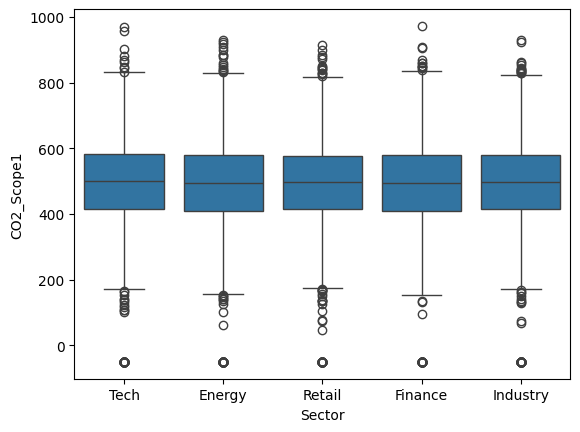

In [28]:
sns.boxplot(df,
            x="Sector",
            y="CO2_Scope1")
plt.show()

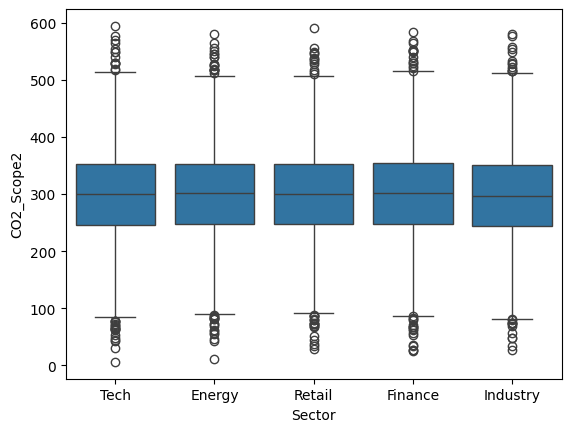

In [29]:
sns.boxplot(df,
            x="Sector",
            y="CO2_Scope2")
plt.show()

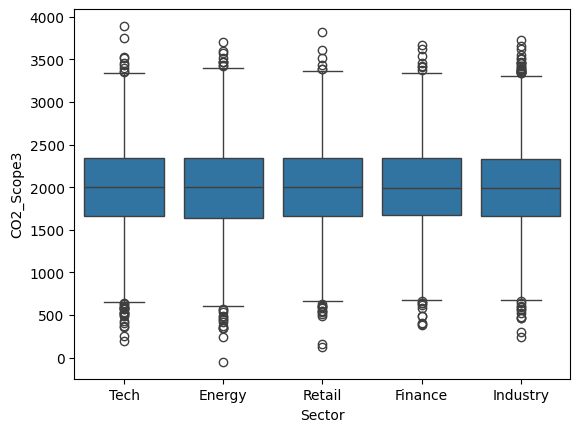

In [30]:
sns.boxplot(df,
            x="Sector",
            y="CO2_Scope3")
plt.show()

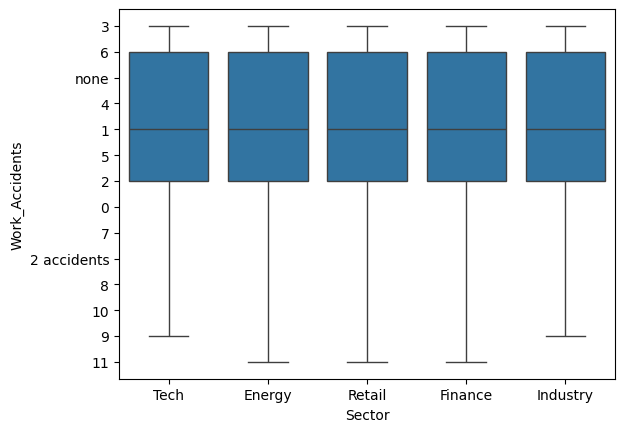

In [31]:
sns.boxplot(df,
            x="Sector",
            y="Work_Accidents")
plt.show()

<Axes: xlabel='Sector', ylabel='Work_Accidents'>

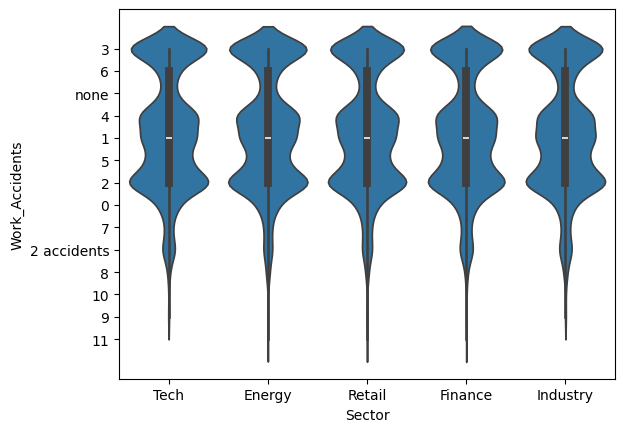

In [35]:
sns.violinplot(df,
               x="Sector",
               y="Work_Accidents")

<Axes: xlabel='Sector', ylabel='CO2_Scope1'>

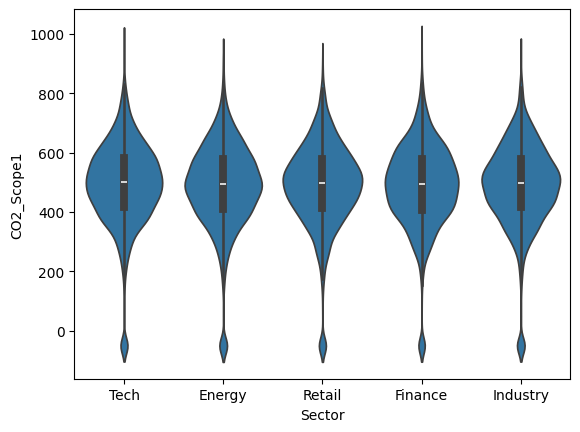

In [36]:
sns.violinplot(df,
               x="Sector",
               y="CO2_Scope1")

- 3.1 Par année

In [32]:
df.groupby("Fiscal_Year")[["CO2_Scope1","CO2_Scope2","CO2_Scope3"]].mean()

CO2_Scope1  CO2_Scope2   CO2_Scope3
Fiscal_Year                                     
2020         489.906925  299.455059  2000.798600
2021         488.936425  299.742181  2006.331600
2022         489.572150  299.982131  1998.917450
2023         487.895600  298.199447  1988.324225
2024         489.651575  299.667094  1995.510550

# CONCLUSION
- Problèmes de qualité détectés
- Colonnes prioritaires à nettoyer
- Décisions à appliquer dans Dataiku: normalisation formats/ standardisation catégories/ parsing JSON/ flags d'anomalies/ gestion des NaN

## identification des valeurs hors normes

In [33]:
# df["Waste_Issue"] = df["Waste_Recycled_Ratio"].apply(lambda x: x < 0 or x > 1 )
# print(f"il y a",df["Waste_Issue"].mean() * 100,"% de valeurs anormales")